Dataframe with first column as index
              theta_1   theta_2   theta_3   theta_4   theta_5    theta_6
datetime                                                               
2017-01-01  0.756936 -1.467790  0.096136 -0.115306 -0.447908   0.902579
2017-01-02  0.767089  0.185797 -1.428536 -0.086443 -0.954288   1.930909
2017-01-03  0.404544  1.415887  0.443466  0.000200 -0.892351   2.449691
2017-01-04  1.313957 -1.804471 -0.836986  0.011785 -1.012518   1.182085
2017-01-05  0.209862  1.315868  0.140993 -0.046473 -1.417092   1.742433
...              ...       ...       ...       ...       ...        ...
2019-12-27 -1.520171 -1.128868  1.108275  0.936817  0.948045  11.755980
2019-12-28  0.338910 -3.178251  1.484579  1.051123  1.025288  11.397092
2019-12-29  0.263781  0.045725 -0.112476  0.823782  0.914111  10.918941
2019-12-30 -0.425098 -1.002701 -0.834294  0.850904  0.801977  11.140722
2019-12-31  0.848302  3.510521 -0.280626  0.967050  1.091803  11.989975

[1095 rows x 6 columns]


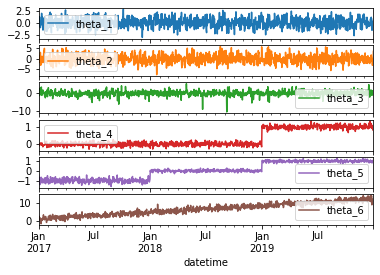

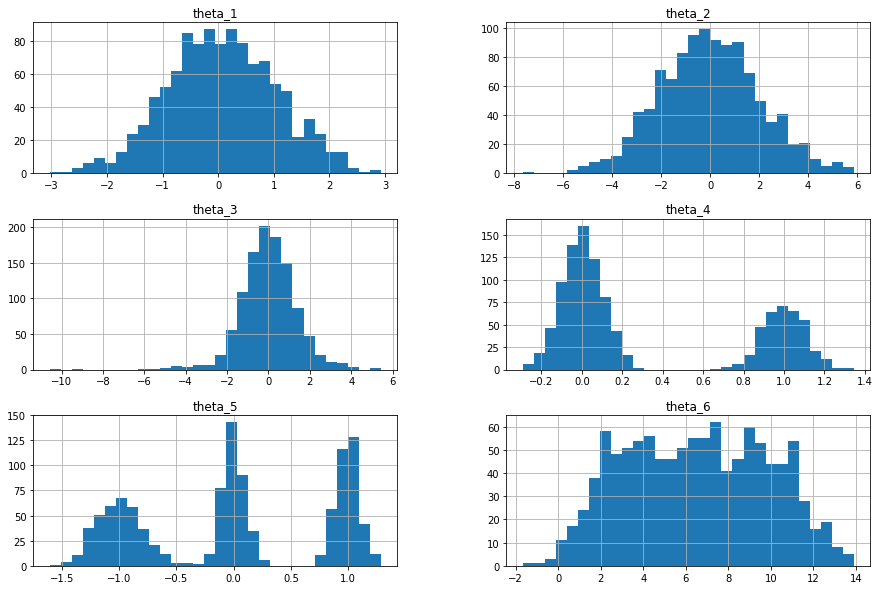

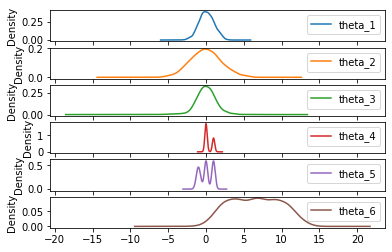

Analysis for columns theta_1 - theta_4 in 2018
Dataframe for 2018 with columns theta_1 - theta_4              theta_1   theta_2   theta_3   theta_4
datetime                                          
2018-01-01  0.682693 -3.091767 -0.475717 -0.238530
2018-01-02 -0.283107 -0.979955  1.233933  0.158031
2018-01-03  1.572221 -2.033528  2.196317  0.041347
2018-01-04 -1.042981  0.651530  1.060125  0.064832
2018-01-05 -1.392614 -2.570905 -0.600063 -0.015025
...              ...       ...       ...       ...
2018-12-27  0.473556 -0.651265 -0.523058  0.076798
2018-12-28  1.433117  0.325632  0.905920  0.028891
2018-12-29  0.285428 -0.476290  1.082404  0.111482
2018-12-30  2.249273 -1.233575 -0.666277 -0.080878
2018-12-31  0.316409  5.673544 -0.964592 -0.150844

[365 rows x 4 columns]


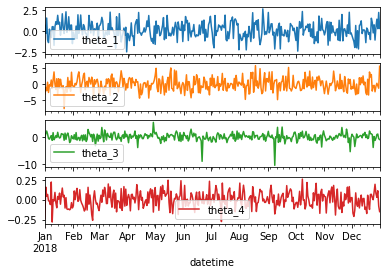

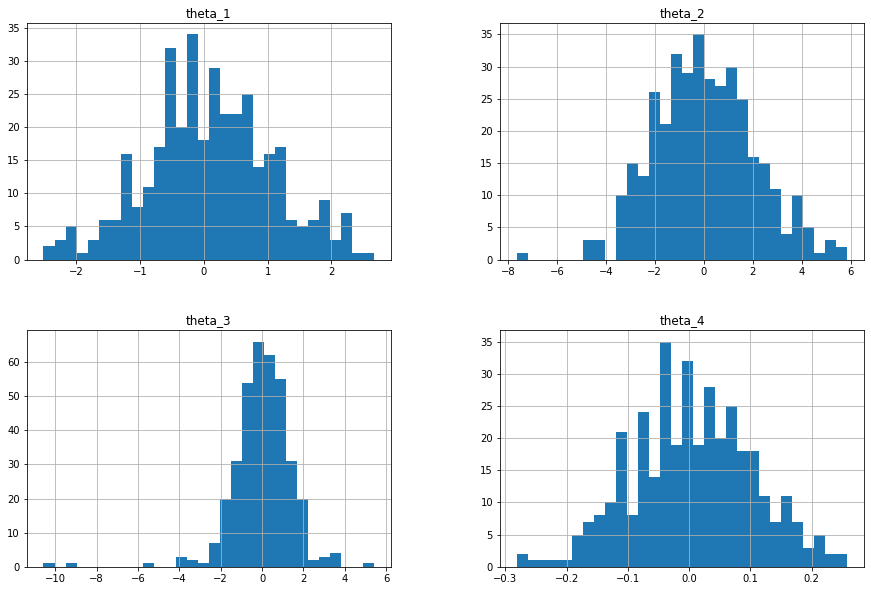

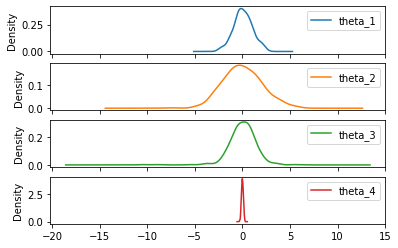

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde

df = pd.read_csv ('Data1.csv')
df = df.rename(columns={"Unnamed: 0": "datetime"})
df["datetime"] = pd.to_datetime(df["datetime"])
#print('Dataframe with default index\n',df)

df = df.set_index('datetime')
print('Dataframe with first column as index\n',df)

df.plot(subplots = True) #time series
plt.show()

df.hist(bins=30, figsize=(15, 10)) #histogram
plt.show()

df.plot.kde(subplots = True) #KDE-s
plt.show()

print('Analysis for columns theta_1 - theta_4 in 2018')
df_new = df.loc['2018','theta_1':'theta_4']
print('Dataframe for 2018 with columns theta_1 - theta_4', df_new)

df_new.plot(subplots = True) #time series
plt.show()

df_new.hist(bins=30, figsize=(15, 10)) #histogram
plt.show()

df_new.plot.kde(subplots = True) #KDE-s
plt.show()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



       Mean    MCSE  StdDev     5%   50%   95%   N_Eff  N_Eff/s  R_hat
name                                                                  
lp__  -9.50  0.0220    0.78 -11.00 -9.20 -9.00  1300.0  15000.0    1.0
theta  0.54  0.0036    0.14   0.31  0.54  0.76  1400.0  17000.0    1.0


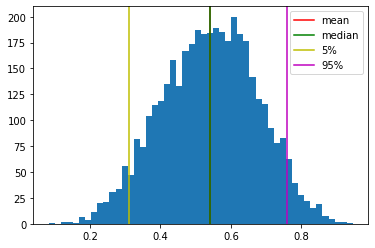

In [ ]:
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

#F = number of letters in first name (F = 5)
#L = number of letters in last name (L=6)

dataset = {
    'N': 11,
    'y': [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]
}
cdm_model = CmdStanModel(stan_file='bern_1.stan')

cdm_fit = cdm_model.sample(data=dataset)

theta = cdm_fit.stan_variable('theta')

df = cdm_fit.summary()
print(df)
df_theta = df.loc['theta']

median = df_theta['50%']
five_percent = df_theta['5%']
ninefive_percent= df_theta['95%']

plt.hist(theta, bins=50)
plt.axvline(theta.mean(), color='r')
plt.axvline(median, color='g')
plt.axvline(five_percent, color='y')
plt.axvline(ninefive_percent, color ='m')

plt.legend(['mean', 'median', '5%', '95%'])
plt.show()